In [1]:
require 'charty'

charty = Charty::Plotter.new(:matplot)
Charty::Matplot.activate_iruby_integration

[:inline, "module://matplotlib.backends.backend_inline"]

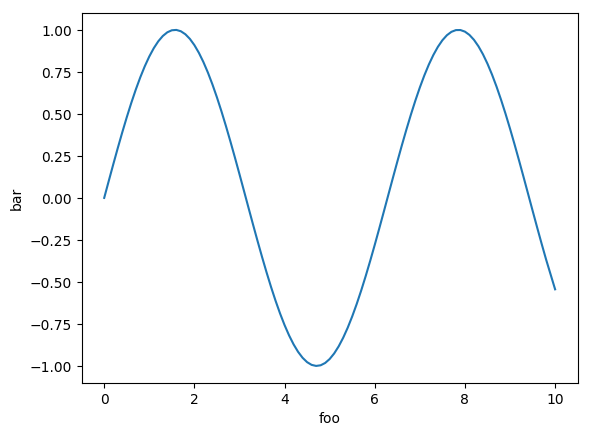

In [2]:
curve = charty.curve do
  function {|x| Math.sin(x) }
  range x: 0..10, y: -1..1
  xlabel 'foo'
  ylabel 'bar'
end
curve.render("sample_images/curve_with_function_matplot.png")

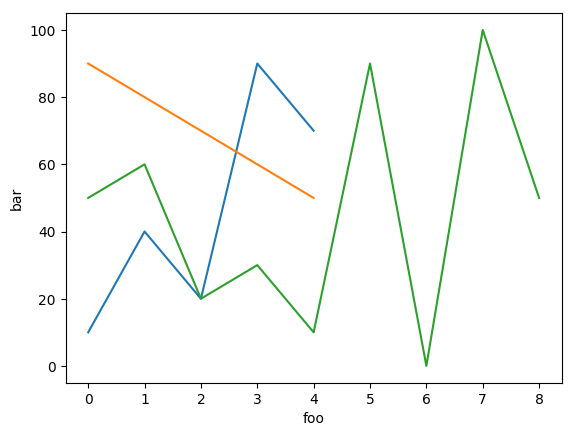

In [3]:
curve2 = charty.curve do
  series [0,1,2,3,4], [10,40,20,90,70]
  series [0,1,2,3,4], [90,80,70,60,50]
  series [0,1,2,3,4,5,6,7,8], [50,60,20,30,10, 90, 0, 100, 50]
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
end
curve2.render("sample_images/curve_matplot.png")

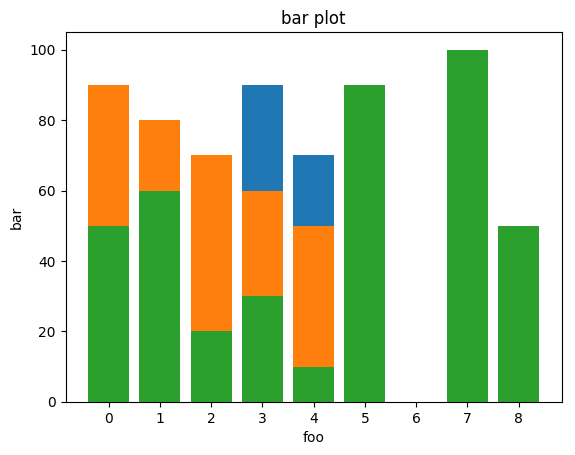

In [4]:
bar = charty.bar do
  series [0,1,2,3,4], [10,40,20,90,70]
  series [0,1,2,3,4], [90,80,70,60,50]
  series [0,1,2,3,4,5,6,7,8], [50,60,20,30,10, 90, 0, 100, 50]
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'bar plot'
end
bar.render("sample_images/bar_matplot.png")

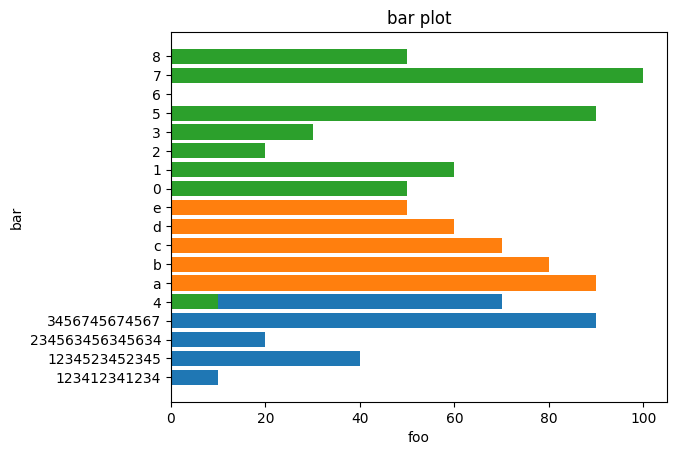

In [5]:
barh = charty.barh do
  series [123412341234,1234523452345,234563456345634,3456745674567,"4"], [10,40,20,90,70]
  series ["a","b","c","d","e"], [90,80,70,60,50]
  series ["0","1","2","3","4","5","6","7","8"], [50,60,20,30,10, 90, 0, 100, 50]
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'bar plot'
end
barh.render("sample_images/barh_matplot.png")

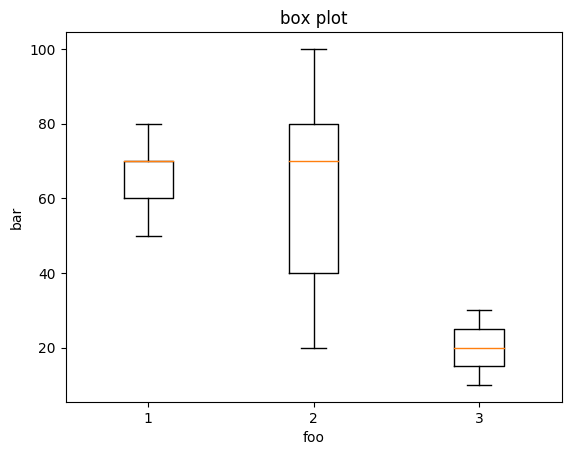

In [6]:
boxplot = charty.boxplot do
  data [[60,70,80,70,50], [100,40,20,80,70], [30, 10]]
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'box plot'
end
boxplot.render("sample_images/boxplot_matplot.png")

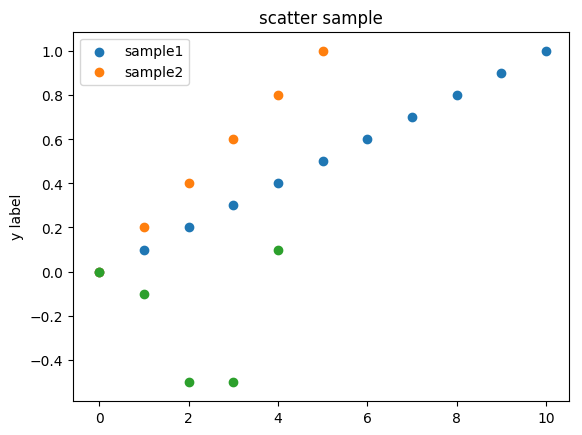

In [7]:
scatter = charty.scatter do
  series 0..10, (0..1).step(0.1), label: 'sample1'
  series 0..5, (0..1).step(0.2), label: 'sample2'
  series [0, 1, 2, 3, 4], [0, -0.1, -0.5, -0.5, 0.1]
  range x: 0..10, y: -1..1
  # xlabel 'x label'
  # xlabel ''
  ylabel 'y label'
  title 'scatter sample'
end
scatter.render("sample_images/scatter_matplot.png")

In [8]:
layout = charty.layout

#<Charty::Layout:0x00007f89d6291870 @frontend=#<Charty::Matplot:0x00007f89d713e580 @plot=<module 'matplotlib.pyplot' from '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>, @series=[#<struct Charty::Series xs=0..10, ys=#<Enumerator: 0..1:step(0.1)>, zs=nil, xerr=nil, yerr=nil, label="sample1">, #<struct Charty::Series xs=0..5, ys=#<Enumerator: 0..1:step(0.2)>, zs=nil, xerr=nil, yerr=nil, label="sample2">, #<struct Charty::Series xs=[0, 1, 2, 3, 4], ys=[0, -0.1, -0.5, -0.5, 0.1], zs=nil, xerr=nil, yerr=nil, label=nil>]>, @layout=#<Charty::ArrayLayout:0x00007f89d62917f8 @array=[], @direction=:horizontal>>

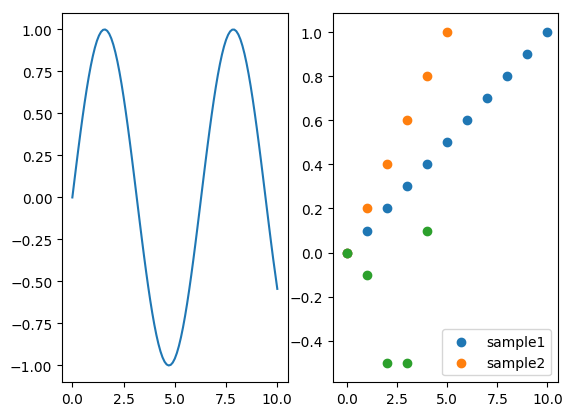

In [9]:
layout << curve
layout << scatter
layout.render("sample_images/subplot_matplot.png")

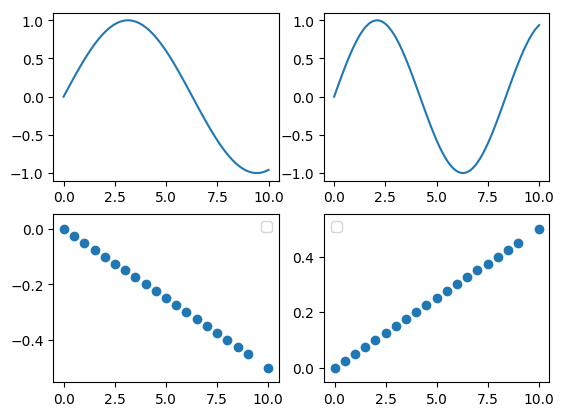

In [10]:
curve_list = [0.5, 0.75].map do |f|
  charty.curve(f:f) do
    function {|x| Math.sin(f*x) }
    range x: 0..10, y: -1..1
  end
end

scatter_list = [-0.5, 0.5].map do |f|
   charty.scatter(f: f) do
    series Charty::Linspace.new(0..10, 20), Charty::Linspace.new(0..f, 20)
    range x: 0..10, y: -1..1
  end
end

grid_layout = charty.layout(:grid2x2)
grid_layout << curve_list
grid_layout << scatter_list
grid_layout.render("sample_images/subplot2_matplot.png")

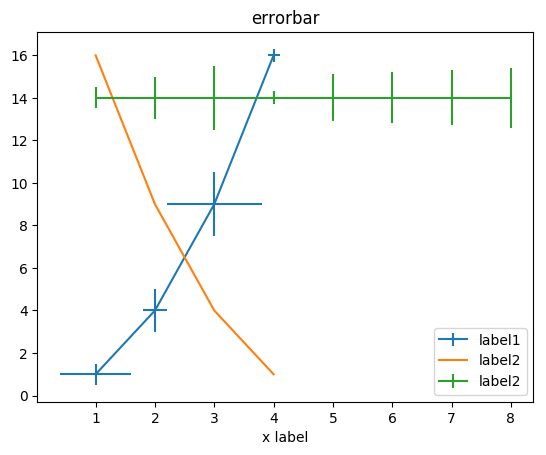

In [13]:
error_bar = charty.error_bar do
  series [1,2,3,4], [1,4,9,16], xerr: [0.5,1.0,1.5,0.3], yerr: [0.6,0.2,0.8,0.1], label: 'label1'
  series [1,2,3,4], [16,9,4,1], label: 'label2'
  series [1,2,3,4,5,6,7,8], [14,14,14,14,14,14,14,14], label: 'label2', xerr: [0.5,1.0,1.5,0.3, 1.1, 1.2, 1.3, 1.4]
  range x: 0..10, y: -1..20
  xlabel 'x label'  
  title 'errorbar'
end
error_bar.render("sample_images/error_bar_matplot.png")

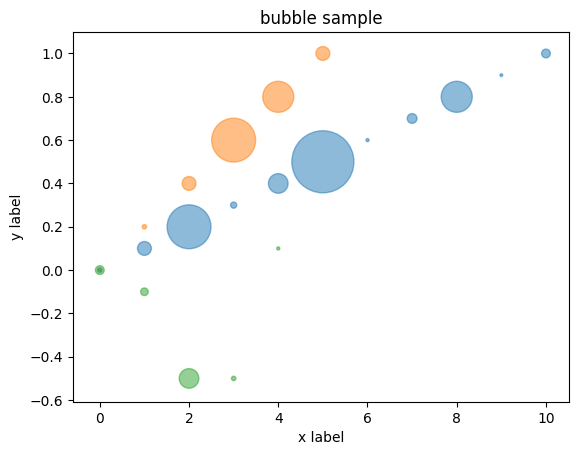

In [14]:
bubble = charty.bubble do
  series 0..10, (0..1).step(0.1), [10, 100, 1000, 20, 200, 2000, 5, 50, 500, 4, 40], label: 'sample1'
  series 0..5, (0..1).step(0.2), [1, 10, 100, 1000, 500, 100], label: 'sample2'
  series [0, 1, 2, 3, 4], [0, -0.1, -0.5, -0.5, 0.1], [40, 30, 200, 10, 5]
  range x: 0..10, y: -1..1
  xlabel 'x label'
  ylabel 'y label'
  title 'bubble sample'
end
bubble.render("sample_images/bubble_matplot.png")

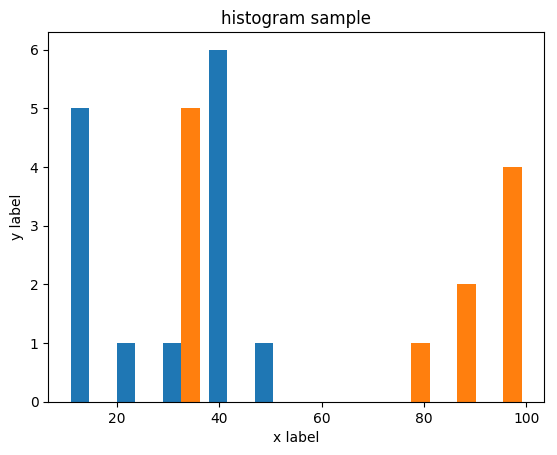

In [15]:
hist = charty.hist do
  data [[10, 10, 20, 30, 40, 40,40,40,40,40, 50, 10, 10, 10], [100, 100, 100, 100, 90, 90, 80, 30, 30, 30, 30, 30]]
  range x: 0..100, y: 0..7
  xlabel 'x label'
  ylabel 'y label'
  title 'histogram sample'
end
hist.render("sample_images/hist_matplot.png")